In [27]:
import json
import requests
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [11]:
sns.set_palette('Set2')
get_ipython().run_line_magic('matplotlib', 'inline')

In [12]:
#Read the data from the file
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
df = pd.DataFrame(json.loads(res.content)['Data'])
df.time = pd.to_datetime(df.time, unit='s')
df.time=df.time.dt.strftime('%Y-%m-%d')
df = df.set_index('time')

In [4]:
len(df)

62180672

,Date,Timestamp,Open,High,Low,Close,Volume
62180667,20190720,12:38:10,1.20112,1.2034,1.2001,1.2033,1.3
62180668,20190720,12:38:10,1.20112,1.2034,1.2001,1.2033,1.3
62180669,20190720,12:38:10,1.20112,1.2034,1.2001,1.2033,1.3
62180670,20190720,12:38:10,1.20112,1.2034,1.2001,1.2033,1.3
62180671,20190720,12:38:10,1.20112,1.2034,1.2001,1.2033,1.3


In [13]:
split_row = len(df) - int(0.4 * len(df))
train_data = df.iloc[:split_row]
test_data = df.iloc[split_row:]



In [14]:
split_row

1201

In [15]:
ind=df[1202:2001].index.tolist()

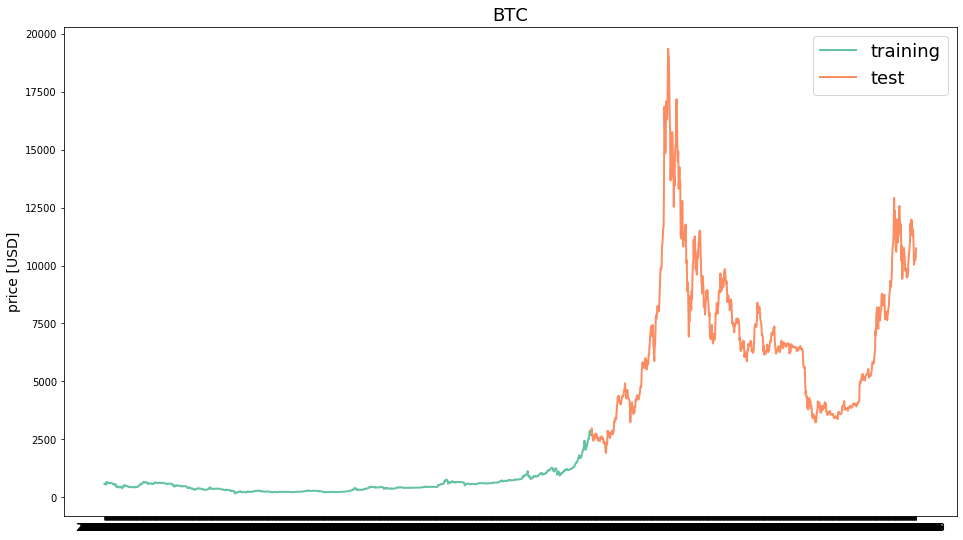

In [16]:
#plot test data vs train data graph
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.plot(train_data['close'], label='training', linewidth=2)
ax.plot(test_data['close'], label='test', linewidth=2)

ax.set_ylabel('price [USD]', fontsize=14)
ax.set_title('BTC', fontsize=18)
ax.legend(loc='best', fontsize=18);

In [17]:
#seperate 'x' axis and 'y' axis for train and test data
x_train = train_data[['high','low','open','volumefrom','volumeto']]
y_train = train_data[['close']]
x_test = test_data[['high','low','open','volumefrom','volumeto']]
y_test = test_data[['close']]

In [18]:
#Scale data to normalize it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)
x_test = scaler.transform(x_test)
y_test = scaler1.transform(y_test)

In [19]:
#save 'X' scaler to a file
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

/home/dk657/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['scaler.save']

In [20]:
#Save 'Y' scaler to a file
scaler_filename = "scaler1.save"
joblib.dump(scaler1, scaler_filename) 

['scaler1.save']

In [21]:
#Re-shape 'x' to use it for training
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [22]:
#Train the Model
model = Sequential()
model.add(LSTM(20, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('linear'))
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mae', optimizer=adam)
history = model.fit(x_train, y_train, epochs=50, batch_size=4, verbose=1, shuffle=True)

W0819 17:11:00.486688 140356285290304 deprecation_wrapper.py:119] From /home/dk657/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 17:11:00.741928 140356285290304 deprecation_wrapper.py:119] From /home/dk657/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 17:11:00.755518 140356285290304 deprecation_wrapper.py:119] From /home/dk657/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 17:11:01.123925 140356285290304 deprecation_wrapper.py:119] From /home/dk657/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_w

Epoch 1/50
1201/1201 [==============================] - 3s 3ms/step - loss: 0.0562
Epoch 2/50
1201/1201 [==============================] - 1s 772us/step - loss: 0.0172
Epoch 3/50
1201/1201 [==============================] - 1s 734us/step - loss: 0.0147
Epoch 4/50
1201/1201 [==============================] - 1s 769us/step - loss: 0.0135
Epoch 5/50
1201/1201 [==============================] - 1s 756us/step - loss: 0.0131
Epoch 6/50
1201/1201 [==============================] - 1s 760us/step - loss: 0.0119
Epoch 7/50
1201/1201 [==============================] - 1s 756us/step - loss: 0.0118
Epoch 8/50
1201/1201 [==============================] - 1s 771us/step - loss: 0.0120
Epoch 9/50
1201/1201 [==============================] - 1s 754us/step - loss: 0.0111
Epoch 10/50
1201/1201 [==============================] - 1s 781us/step - loss: 0.0111
Epoch 11/50
1201/1201 [==============================] - 1s 785us/step - loss: 0.0122
Epoch 12/50
1201/1201 [==============================] - 1s 801us

In [23]:
#Save the trained model to a file to use it later
model.save('model.h5')

In [24]:
#Find predicted value and check for Mean-squared error
preds = model.predict(x_test).squeeze()
mean_absolute_error(preds, y_test)

0.7324749007255346

In [25]:
#Inverse Transform 'Y' to plot on graph
y_inv=scaler1.inverse_transform(y_test).tolist()
y_list = [item for sublist in y_inv for item in sublist]
pred_lst=scaler1.inverse_transform([preds])[0].tolist()

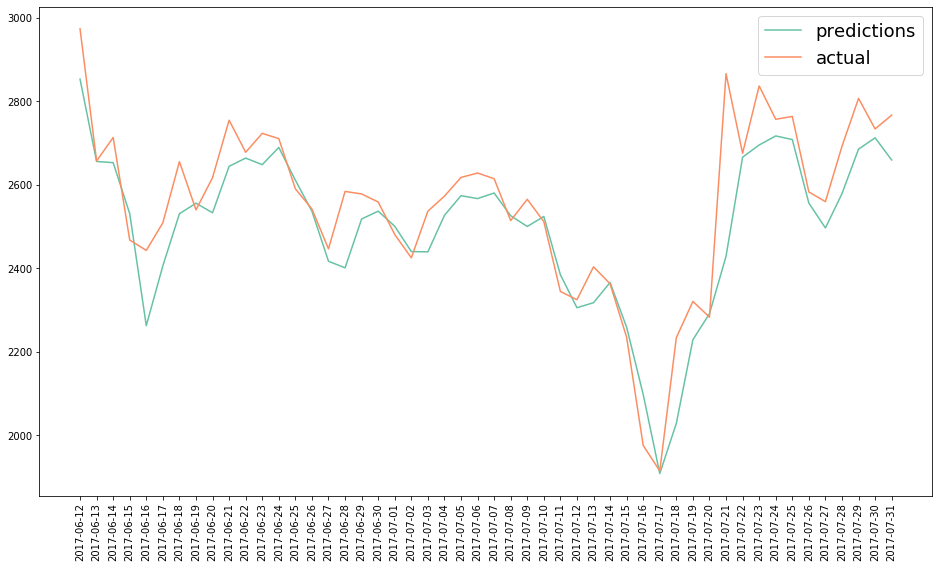

In [26]:
#Plot Actual VS Predicted price
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.plot(ind[0:50],pred_lst[0:50],label='predictions')
ax.plot(ind[0:50],y_list[0:50],label='actual')
ax.legend(loc='best', fontsize=18)
plt.xticks(rotation=90)
plt.show()

